# Programming exercise Lesson 1  

In the previous programming exercise, we modeled a discrete-time version of the logistic equation. The **discrete-time logistic equation** is an example of a **discrete map**, that is, a function that recursively maps input values from a specific interval to output values from the same interval. This definition implies that if we start from a value x_0 located inside the interval, the subsequent values will never leave the interval. The interval in which the discrete map "works" is called the **map's domain**. In the case of the logistic map, its domain is the interval [0,1].

In [16]:
from matplotlib import pyplot as plt

def plot_x_values(x_0,r,n_iter):
    
    x_values = []
    x = x_0

    for i in range(n_iter):
        x_values.append(x)
        y = r*x*(1-x)
        x = float(y)
    fig, ax = plt.subplots(dpi = 80, figsize = (4,2))
    ax.plot(list(range(n_iter)), x_values)
    ax.set_xlim((n_iter-50,n_iter))
    ax.set_xlabel("Iterations")
    ax.set_ylabel("x value")
    ax.set_title("r: {}   x_0: {}".format(r,x_0))
    return x_values

#### QUESTION 1: What happens if you run the logistic map starting from a value that does not belong to its domain (that is, if x0 > 1 or x0 < 0)?.

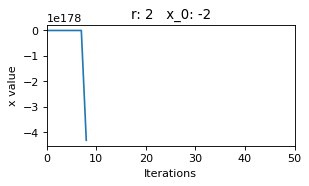

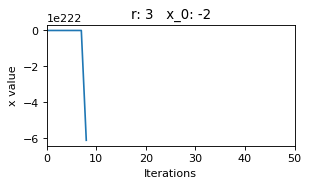

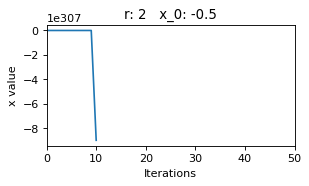

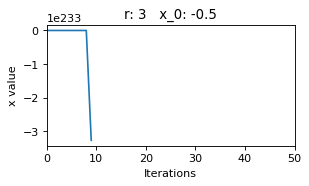

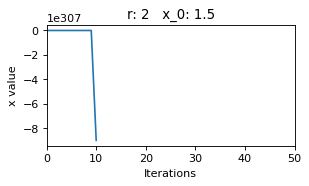

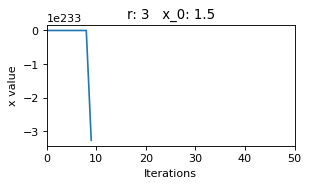

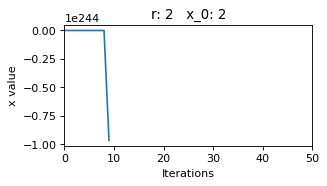

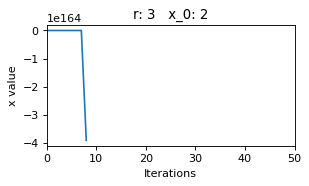

In [17]:
r_list = [2, 3]
x_0_list = [-2, -0.5, 1.5, 2]

for x_0 in x_0_list:
    for r in r_list:
        plot_x_values(x_0, r, n_iter = 50)
        #plt.savefig(fname = "my_plot_{}.jpg".format(r_list.index(r)+1), dpi = 200)


When x_0 is out of the map's domain (x_0<0 or x_0>1), x value rapidly tends to -inf after a few iterations.

#### QUESTION 2: What happens if you set r > 4? Does the discrete logistic equation with r > 4 fulfil the properties of a discrete map with domain [0,1]?

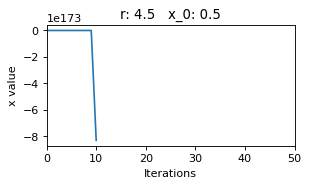

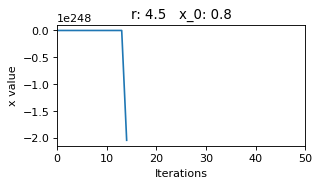

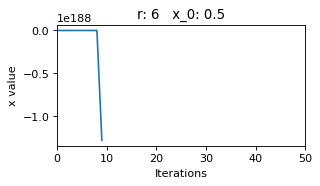

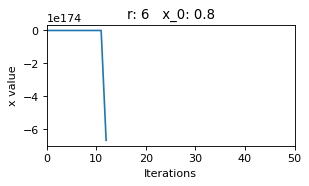

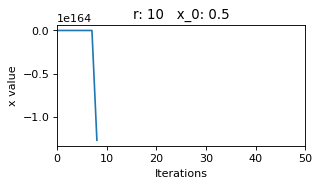

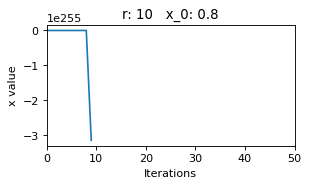

In [18]:
r_list = [4.5, 6, 10]
x_0_list = [0.5, 0.8]

for r in r_list:
    for x_0 in x_0_list:
        plot_x_values(x_0, r, n_iter = 50)
        #plt.savefig(fname = "my_plot_{}.jpg".format(r_list.index(r)+1), dpi = 200)


Similarly, when r>4, x value goes out of the logistic map's domain [0,1] tending to -inf after a certain number of iterations.

An interesting property that you already noticed in the previous modeling exercise is that the **qualitative behavior** of the system strongly depends on the **parameter *r***, but is not affected by x0. In this exercise, we will characterize the behavior of the logistic map for different values of *r*. Specifically, we will focus on its long-term dynamics: does it collapse to 0? Does it approach a fixed value > 0? Does it oscillate between 2 or more values in a periodic way? Does it show an erratic behavior?

#### QUESTION 3: Describe with words the long-term qualitative behavior of the logistic map for the values of r that you explored in the previous exercise. Hint: if you are not sure the system reached a stable (long-term) behavior, iterate the function for a higher number of steps (e.g., n = 500) and plot only the last 20-30 values.


[0.02194125450874311, 0.021459835859325673, 0.020999311304216475, 0.02055834022896508, 0.020135694875995196, 0.019730248667856016, 0.01934096595536058, 0.018966892991274163, 0.01860714996153172, 0.01826092393184079]
[0.5999999999999515, 0.6000000000000243, 0.5999999999999879, 0.6000000000000061, 0.5999999999999969, 0.6000000000000015, 0.5999999999999992, 0.6000000000000004, 0.5999999999999998, 0.6000000000000001]
[0.5130445095326298, 0.7994554904673701, 0.5130445095326298, 0.7994554904673701, 0.5130445095326298, 0.7994554904673701, 0.5130445095326298, 0.7994554904673701, 0.5130445095326298, 0.7994554904673701]
[0.5008842103072179, 0.8749972636024641, 0.38281968301732416, 0.8269407065914387, 0.5008842103072179, 0.8749972636024641, 0.38281968301732416, 0.8269407065914387, 0.5008842103072179, 0.8749972636024641]
[0.8249269684251775, 0.5488053677220899, 0.940948537109744, 0.21114467295895145, 0.6329378801520338, 0.8828445760785973, 0.3930341161553565, 0.90652153883467, 0.32201290616126915,

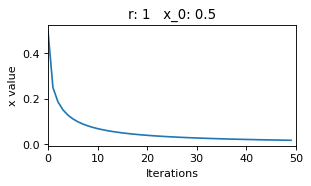

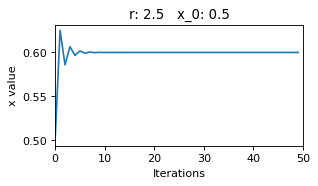

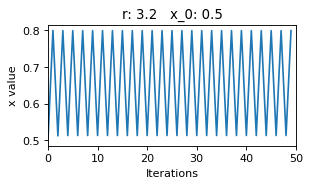

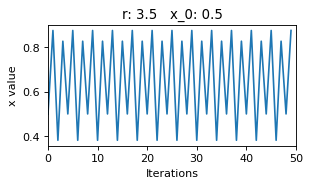

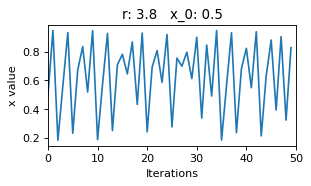

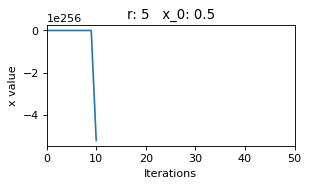

In [19]:
r_list = [1, 2.5, 3.2, 3.5, 3.8, 5]
x_0 = 0.5

for r in r_list:
    print(plot_x_values(x_0, r, n_iter = 50)[-10:])  # Print last 10 values of the iteration.
    #plt.savefig(fname = "my_plot_{}.jpg".format(r_list.index(r)+1), dpi = 200)

* r = 1 -> The function shows an exponential decay where x value tends to 0.
* r = 2.5 -> The function oscilates irregularly during the first few iterations and stabilizes in a fixed value x>0.
* r = 3.2 -> The function oscilates between two values (0<x<1) in a periodic way.
* r = 3.5 -> The function oscilates between four values (0<x<1) in a periodic way.
* r = 3.8 -> The function shows a non-periodical erratic behaviour.
* r = 5 -> The function goes out of the logistic map's domain, x value rapidly tends to -inf.

#### QUESTION 4: Systematize the characterization of long-term behaviors and design a function that automatically identifies the *long-term regime* associated to a given value of *r*. The function should do the following:

1. Given a pair of values of r and x0 (inputs), iterate the logistic function n = 1000 times (there is no need to store the values of these iterations). If this takes too long, try with n = 500.
2. Record values from n = 1000 to n = 1100
3. Process the values obtained in step (2), returning a qualitative description of the long-term behavior. To implement this step, you may need to think about how to describe the long-term behavior in a systematic way. I suggest that you classify the behavior of the system based on the period of its oscillations (period 1: fixed point; period 2: the system oscillates between 2 values; period 3: the system oscillates between 3 values; and so on). With this classification, the output of the function will be a number. Optionally, the function can return 0 if the system collapses to x = 0.

In [20]:
import numpy as np
def function_period(x_0,r,n_iter=1000):
    
    x = x_0
    x_values = []
    for i in range(n_iter):
        y = r*x*(1-x)
        x = float(y)
    for i in range(100):
        x_values.append(x)
        y = r*x*(1-x)
        x = float(y)
    
    x_values.sort()
    uniques = [x_values[0]]
    for i in range(1,100):
        if abs(x_values[i] - x_values[i-1]) > 0.0001:
            uniques.append(x_values[i])
            
    if len(uniques)==1 and 0 < uniques[0] < 1e-4:      ## Functions with limit 0 will return 0.
        return 0                                       ## Functions out of domain [0,1] will return Inf/-Inf.
    elif uniques[0] < 0:                               ## else, return number of unique values (period).
        return uniques[0]        
    else:
        return len(uniques)

#### QUESTION 5: Write a script that loops over a range of values of *r* (from *r* = 0 to *r* = 4 in intervals of 0.01), calls the function from task 4, and records, for each *r*, the long-term period of the system (let's call it *P*). You can start from any value of x0 such that 0 < x0 < 1. Plot *r* vs *P* and discuss your results.


In [21]:
P = []
r_values = []

for r in np.arange(start=0,stop=4.01,step=0.01):
    P.append(function_period(x_0=0.5, r=r))
    r_values.append(r)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 

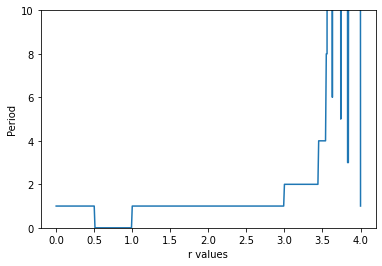

In [22]:
fig, ax = plt.subplots()
ax.plot(r_values, P)
ax.set_xlabel("r values")
ax.set_ylabel("Period")
ax.set_ylim((0,10))
print(P)

We can observe how the long-term period of the system varies as a function of *r*. For *r* values 0 < r < 0.5 and 1 < r < 3, the system stabilizes in a single value 0 < x < 1. When *r* ranges between r = 0.5 and r = 1, the function collapses to x = 0. For *r* values 3 < r < ~3.45, the system oscillates between two values 0 < (x1, x2) < 1 in a periodic way, and for ~3.45 < r < ~3.55, it oscillates periodically between four different values 0 < (x1, x2, x3, x4) < 1. Finally, from r ≃ 3.55 to r = 4, the periodicity of the system is quite more variable, showing high period values around P ~ 100 and sudden decreases down to P = 3, P = 5, P = 6 or P = 9.

#### QUESTION 6: Based on what you already know, do you think that the results would change if you use a different x0?

Since the qualitative behaviour of the system largely depends on the value of *r* but not on x_0, I would speculate that the period distribution would remain unaffected using a different x_0 value; however, the values of x at which the system stabilizes or oscillates could possibly vary. We can easily simulate this to check if this affirmation is correct:

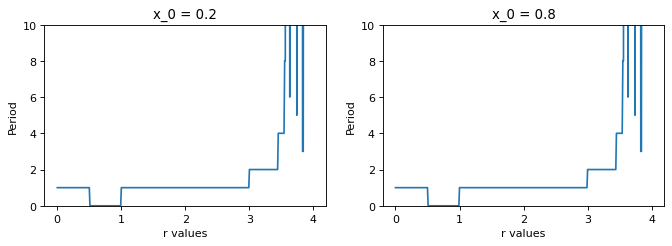

In [23]:
fig, ax = plt.subplots(1,2, figsize = (10,3), dpi = 80)

x_0 = [0.2, 0.8]
for i in [0,1]:
    P = []
    r_values = []
    for r in np.arange(start=0,stop=4.01,step=0.01):
        P.append(function_period(x_0[i], r=r))
        r_values.append(r)

    ax[i].plot(r_values, P)
    ax[i].set_xlabel("r values")
    ax[i].set_ylabel("Period")
    ax[i].set_ylim((0,10))
    ax[i].set_title("x_0 = {}".format(x_0[i]))